In [1]:
import kdezero
import kdezero.functions as F
from kdezero.models import MLP
import numpy as np

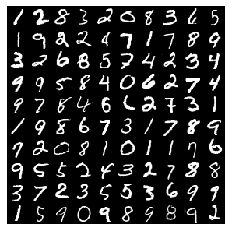

In [2]:
train_set = kdezero.datasets.MNIST(train=True)
train_set.show()

In [3]:
test_set = kdezero.datasets.MNIST(train=False)
print(len(train_set))
print(len(test_set))

60000
10000


In [4]:
batch_size = 100
train_loader = kdezero.DataLoader(train_set, batch_size)
test_loader = kdezero.DataLoader(test_set, batch_size, shuffle=False)

In [5]:
hidden_size = 1000

model = MLP((hidden_size, hidden_size, 10), activation=F.relu)
optimizer = kdezero.optimizers.Adam().setup(model)
optimizer.add_hook(kdezero.optimizers.WeightDecay(1e-4))

In [6]:
if kdezero.cuda.gpu_enable:
    train_loader.to_gpu()
    test_loader.to_gpu()
    model.to_gpu()
    print("to gpu")

to gpu


In [7]:
max_epoch = 5

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    print('epoch: {}'.format(epoch+1))
    print('train loss: {}, accuracy: {}'.format(
        sum_loss / len(train_set), sum_acc / len(train_set)))

    sum_loss, sum_acc = 0, 0
    with kdezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)

    print('test loss: {}, accuracy: {}'.format(
        sum_loss / len(test_set), sum_acc / len(test_set)))

epoch: 1
train loss: 0.1910525824315846, accuracy: 0.9432833333333334
test loss: 0.10639465189538896, accuracy: 0.9681
epoch: 2
train loss: 0.07954498826215664, accuracy: 0.97465
test loss: 0.094644485169556, accuracy: 0.9687
epoch: 3
train loss: 0.05772208198206499, accuracy: 0.9823833333333334
test loss: 0.07770943050913047, accuracy: 0.977
epoch: 4
train loss: 0.044605688460481664, accuracy: 0.9854833333333334
test loss: 0.06876128309777414, accuracy: 0.978
epoch: 5
train loss: 0.039281387353354756, accuracy: 0.9879666666666667
test loss: 0.07592462608561618, accuracy: 0.9785


In [8]:
x = test_set[0]
print(x[0].shape, x[1])

(784,) 7


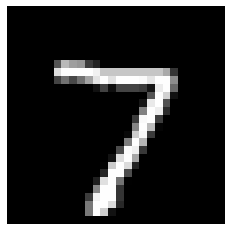

In [9]:
test_set.one_show(0)

In [10]:
x, t = test_set[0]
x = np.array([x])
x = kdezero.cuda.as_cupy(x)
x.shape

(1, 784)

In [11]:
t = np.array([t])
t = kdezero.cuda.as_cupy(t)
t.shape

(1,)

In [12]:
y = model(x)
print(y)
pred = y.data.argmax(axis=1)
print(pred)
F.accuracy(y, t)

variable([[ -5.832845    -0.35675198  -2.7503185    1.0293323   -2.9604409
            -4.5846534  -10.265364     8.834699    -4.3910823    1.4820399 ]])
[7]


variable(1.0)

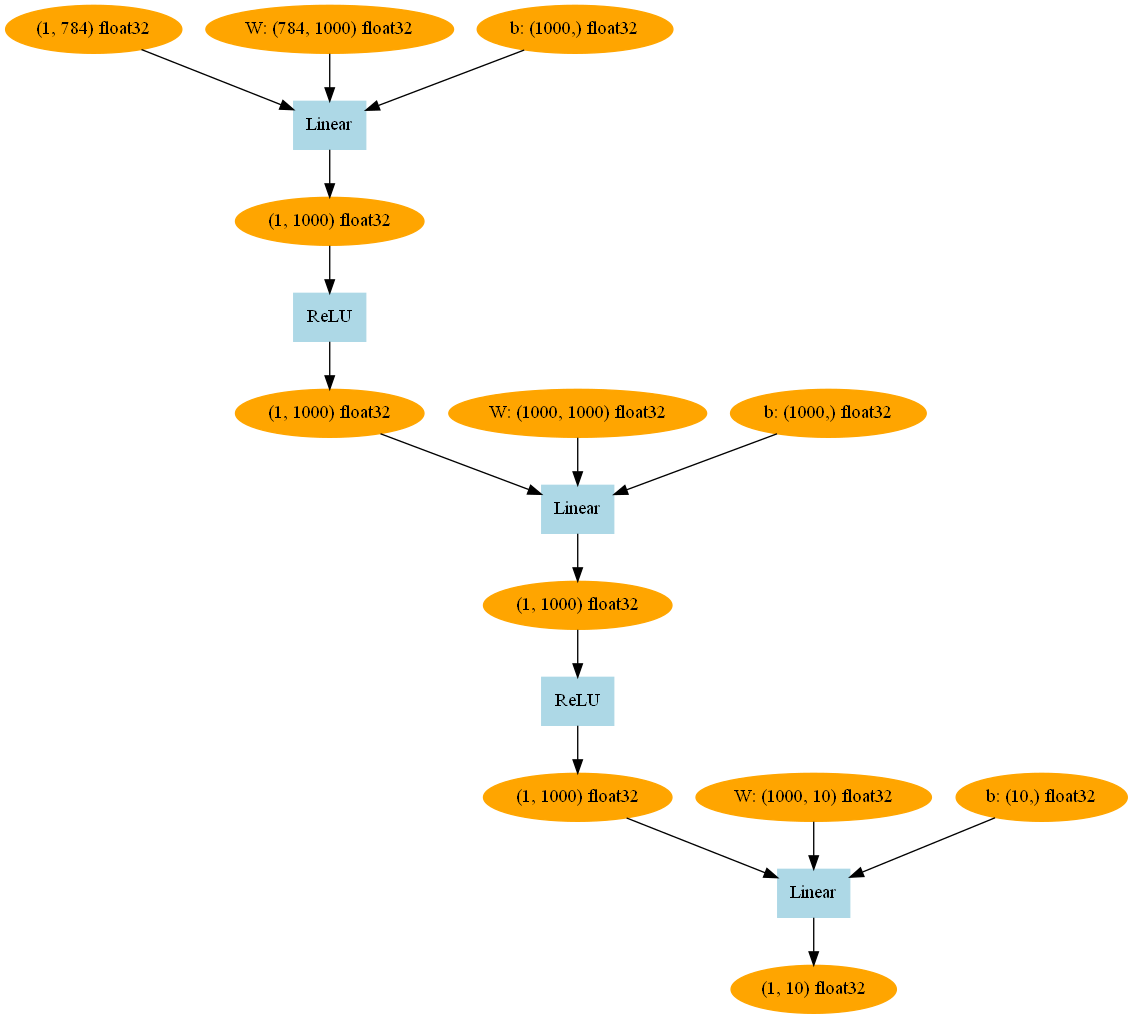

In [13]:
model.plot(x)